In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import seaborn as sns
import os
os.chdir("C:\\Users\\natal\\Python files")

In [2]:
data = pd.read_csv('bbc-text.csv')

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
data['category_id'] = data['category'].factorize()[0] #To create a column with id for each category of texts

In [5]:
data.head()

,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


In [6]:
data.columns

Index(['category', 'text', 'category_id'], dtype='object')

<AxesSubplot:xlabel='category'>

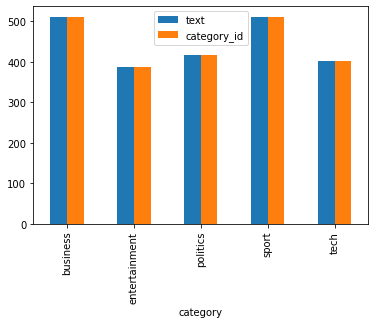

In [7]:
data.groupby('category').count().plot.bar(ylim=0)

In [8]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
data['news_without_stopwords'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stopwords)]))

In [11]:
data.head()

,category,text,category_id,news_without_stopwords
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...


In [12]:
data.shape

(2225, 4)

In [13]:
ps = PorterStemmer()

In [14]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [15]:
data.head()

,category,text,category_id,news_without_stopwords,news_porter_stemmed
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...,ocean twelv raid box offic ocean twelv crime c...


In [16]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [17]:
data.head()

,category,text,category_id,news_without_stopwords,news_porter_stemmed
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...,ocean twelv raid box offic ocean twelv crime c...


In [18]:
#data.drop(columns=['news_poter_stemmed']) #To drop a column

In [19]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')

In [20]:
data.head()

,category,text,category_id,news_without_stopwords,news_porter_stemmed
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...,ocean twelv raid box offic ocean twelv crime c...


In [21]:
freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()

In [22]:
freq.head()

said     7254
mr       3045
year     2599
would    2577
also     2156
dtype: int64

In [23]:
freq2 = freq[freq <=3]

In [24]:
freq2.head()

jockey          3
upsw            3
edinburghbas    3
dudley          3
futurologist    3
dtype: int64

In [25]:
freq3 = list(freq2.index.values)

In [26]:
freq3

['jockey',
 'upsw',
 'edinburghbas',
 'dudley',
 'futurologist',
 'woolworth',
 'codes',
 'homebuy',
 'schuettler',
 'blackman',
 'bonds',
 'mainstay',
 'cbo',
 'scour',
 'rd',
 'hollow',
 'radcliffe',
 'simplest',
 'qualm',
 'snappi',
 'boca',
 'liggett',
 'mentally',
 'spine',
 'endang',
 'ancestor',
 'balance',
 'historian',
 'indiana',
 'spiki',
 'competing',
 'goalscor',
 '444',
 'unaccount',
 'charit',
 'vibe',
 '915',
 'courses',
 'insisting',
 'vatican',
 'glaxo',
 'grove',
 '2050',
 'likelihood',
 'worlds',
 'clown',
 'decathlet',
 'burke',
 'cupwin',
 'superintend',
 'holdings',
 'southan',
 'ellison',
 'flamboy',
 'ion',
 '190m',
 '133m',
 '595',
 'mileston',
 '58bn',
 'alvarez',
 'eject',
 'antiqu',
 'angler',
 'unearth',
 'workplace',
 'contraven',
 'daylewis',
 'correspondent',
 'wentworth',
 '230bn',
 'mcgee',
 'unlikely',
 'awesome',
 'shared',
 'pariss',
 'publicist',
 'dvdlike',
 'satur',
 '102m',
 'engerwitzdorf',
 'denounc',
 'cambodia',
 'deft',
 'gala',
 'hdreadi'

In [27]:
freq3[:10]

['jockey',
 'upsw',
 'edinburghbas',
 'dudley',
 'futurologist',
 'woolworth',
 'codes',
 'homebuy',
 'schuettler',
 'blackman']

In [28]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [29]:
data.head()

,category,text,category_id,news_without_stopwords,news_porter_stemmed
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...,ocean twelv raid box offic ocean twelv crime s...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer(sublinear_tf = True, min_df=5, norm='l2', encoding = 'latin-1', ngram_range=(1,2))

In [32]:
dir(tfidf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transfor

In [33]:
#help(tfidf.sublinear_tf)

In [34]:
#help(tfidf.fit_transform)

In [35]:
features = tfidf.fit_transform(data.news_porter_stemmed).toarray()

In [36]:
#import pickle

In [37]:
#dbfile=open('examplepickle','rb')
#db=pickle.load(dbfile)

In [38]:
#dbfile.close()

In [39]:
#for keys in db:
 #   if keys == 'data':
  #      data = db[keys]
   #     print(db.keys())

In [40]:
#dbfile = open('examplepickle','wb')
#db={}
#db['data']=data
#print(db.keys())
#pickle.dump(db,dbfile)
#dbfile.close()

In [41]:
data.news_porter_stemmed.shape

(2225,)

In [42]:
features.shape

(2225, 15190)

In [43]:
type(features)

numpy.ndarray

In [44]:
features[0]

array([0.        , 0.02456924, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [45]:
len(features[0])

15190

In [46]:
labels=data.category_id

In [47]:
labels.shape


(2225,)

In [48]:
category_id_df = data[['category','category_id']].drop_duplicates().sort_values('category_id')

In [49]:
category_id_df

,category,category_id
0,tech,0
1,business,1
2,sport,2
4,entertainment,3
5,politics,4


In [50]:
category_to_id = dict(category_id_df.values)

In [51]:
category_to_id

{'tech': 0, 'business': 1, 'sport': 2, 'entertainment': 3, 'politics': 4}

In [52]:
id_to_category = dict(category_id_df[['category_id','category']].values)

In [53]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

In [54]:
from sklearn.feature_selection import chi2
N=3
for category,category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features,labels == category_id) 
    indices = np.argsort(features_chi2[0])
    features_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in features_names if len(v.split(' ')) == 1]
    bigrams = [v for v in features_names if (v.split(' ')) == 2]
    print("#  '{}':".format(category))
    print("   .  Most correlated unigrams:\n       . {}".format('\n          .  '.join(unigrams[-N:])))
    print("   .  Most correlated bigrams:\n       . {}".format('\n          .  '.join(bigrams[-N:])))

#  'business':
   .  Most correlated unigrams:
       . oil
          .  growth
          .  bank
   .  Most correlated bigrams:
       . 
#  'entertainment':
   .  Most correlated unigrams:
       . award
          .  star
          .  film
   .  Most correlated bigrams:
       . 
#  'politics':
   .  Most correlated unigrams:
       . blair
          .  tori
          .  labour
   .  Most correlated bigrams:
       . 
#  'sport':
   .  Most correlated unigrams:
       . champion
          .  coach
          .  cup
   .  Most correlated bigrams:
       . 
#  'tech':
   .  Most correlated unigrams:
       . technolog
          .  comput
          .  user
   .  Most correlated bigrams:
       . 


In [55]:
from sklearn.manifold import TSNE 

SAMPLE_SIZE = int(len(features)*.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size = SAMPLE_SIZE, replace = False)
projected_features = TSNE(n_components = 2, random_state=0).fit_transform(features[indices])
colors=['pink','green','midnightblue','orange','darkgrey']

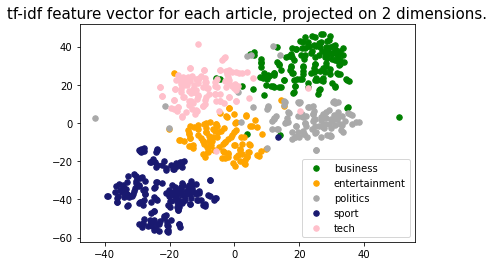

In [56]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices]==category_id).values]
    plt.scatter(points[:,0],points[:,1], s= 30, c=colors[category_id],label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.", fontdict=dict(fontsize=15))
plt.legend()

In [57]:
points.shape

(117, 2)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [59]:
models = [ RandomForestClassifier(n_estimators = 200, max_depth = 3 , random_state = 0 ), MultinomialNB(), LogisticRegression(random_state = 0)]

In [60]:
data.head()

,category,text,category_id,news_without_stopwords,news_porter_stemmed
0,tech,tv future in the hands of viewers with home th...,0,tv future hands viewers home theatre systems p...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left books alone former worldcom...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tigers wary farrell gamble leicester say rushe...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelve raids box office ocean twelve cri...,ocean twelv raid box offic ocean twelv crime s...


In [61]:
data.shape

(2225, 5)

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

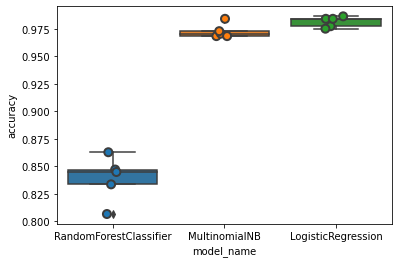

In [62]:
CV = 5
cv_df = pd.DataFrame(index = range(CV*len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y= 'accuracy', data=cv_df)
sns.stripplot(x='model_name', y= 'accuracy', data = cv_df , size = 8, jitter = True , edgecolor='gray', linewidth = 2)

In [63]:
features.shape

(2225, 15190)

In [64]:
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [66]:
y_pred

array([4, 2, 2, 2, 2, 3, 4, 1, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 0, 0, 4, 2,
       2, 4, 4, 0, 0, 2, 2, 3, 3, 3, 2, 4, 0, 1, 4, 1, 3, 1, 0, 4, 0, 2,
       4, 2, 1, 3, 1, 3, 2, 1, 4, 4, 2, 2, 4, 1, 1, 2, 0, 3, 3, 1, 1, 3,
       1, 0, 4, 2, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 2, 2, 3, 1, 0, 1, 4, 1,
       4, 3, 0, 3, 2, 4, 2, 2, 3, 3, 0, 3, 4, 0, 3, 0, 2, 4, 2, 3, 2, 2,
       3, 4, 3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 4, 3, 3, 4, 2, 3, 2,
       4, 4, 2, 4, 1, 0, 0, 2, 2, 4, 2, 2, 2, 3, 0, 1, 2, 3, 3, 2, 4, 0,
       4, 1, 0, 2, 3, 1, 1, 1, 0, 0, 3, 1, 0, 4, 0, 2, 0, 0, 1, 3, 2, 1,
       4, 4, 1, 1, 4, 2, 0, 4, 4, 0, 3, 0, 2, 2, 4, 3, 0, 3, 0, 0, 2, 1,
       1, 2, 0, 3, 2, 3, 4, 2, 2, 2, 2, 0, 3, 4, 1, 2, 3, 1, 0, 1, 3, 3,
       1, 4, 2, 2, 0, 2, 1, 0, 1, 2, 3, 0, 4, 4, 0, 0, 2, 1, 1, 1, 1, 0,
       4, 3, 3, 0, 0, 3, 1, 4, 1, 1, 2, 1, 4, 2, 3, 1, 4, 1, 0, 4, 0, 2,
       0, 4, 1, 2, 2, 3, 3, 1, 3, 4, 0, 3, 1, 2, 3, 1, 2, 1, 0, 3, 4, 4,
       3, 0, 1, 2, 3, 2, 4, 0, 2, 3, 4, 4, 3, 2, 4,

Text(0.5, 15.0, 'Predicted')

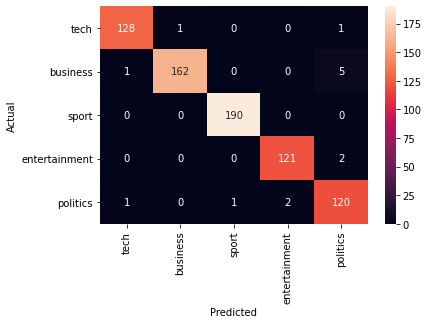

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [68]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [69]:
from sklearn.feature_selection import chi2
N = 5
for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . compani
       . firm
       . bank
       . market
       . share
  . Top bigrams:
       . chief execut
       . stock market
       . analyst said
       . last year
       . econom growth
# 'entertainment':
  . Top unigrams:
       . film
       . star
       . music
       . singer
       . award
  . Top bigrams:
       . box offic
       . lo angel
       . tv show
       . number one
       . new york
# 'politics':
  . Top unigrams:
       . parti
       . labour
       . minist
       . mr
       . tori
  . Top bigrams:
       . mr blair
       . toni blair
       . prime minist
       . mr brown
       . lib dem
# 'sport':
  . Top unigrams:
       . win
       . coach
       . match
       . player
       . club
  . Top bigrams:
       . six nation
       . australian open
       . grand slam
       . bbc sport
       . world cup
# 'tech':
  . Top unigrams:
       . comput
       . use
       . user
       . technolog
       . softwar
 

In [70]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)

In [71]:
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'sport'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'sport'

